In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import the data

In [2]:
train_labels = pd.read_csv('train_labels.csv')

In [3]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [5]:
train_values = pd.read_csv('train_values.csv')

In [6]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
# Create a merged dataframe
merged = pd.merge(left=train_values,right=train_labels,left_on='building_id',right_on='building_id')

### 2. Data Exploration

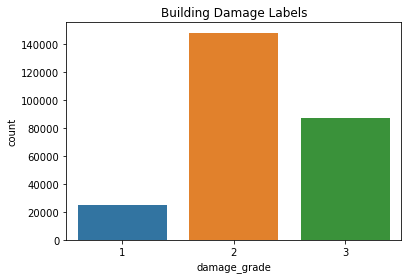

In [9]:
# Visualize the target
sns.countplot(data=merged, x='damage_grade')
plt.title('Building Damage Labels')
plt.show()

In [10]:
# Majority of level 2. Level 1 might need some weights in a model to account for unbalanced structure

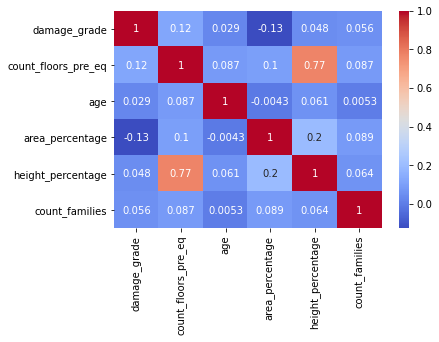

In [11]:
# Visualize correlations with relevant quantitative variables
sns.heatmap(merged[['damage_grade', 'count_floors_pre_eq', 'age',
                    'area_percentage', 'height_percentage', 'count_families']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [12]:
# Positive correlation between number of floors and height makes sense.
# Slight positive correlation between number of floors and damage
# Slight negative correlation between area_perc and damage

In [13]:
# Let's merge some of the categorical binary variables
merged['superstructure'] = merged['has_superstructure_adobe_mud'].apply(
    lambda x: 'am' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_cement_mortar_brick'].apply(
    lambda x: 'cmb' if x == 1 else '')+merged['has_superstructure_cement_mortar_stone'].apply(lambda x: 'cms' if x == 1 else '')+merged['has_superstructure_mud_mortar_brick'].apply(lambda x: 'mmb' if x == 1 else '')+merged['has_superstructure_mud_mortar_stone'].apply(lambda x: 'mms' if x == 1 else '')+merged['has_superstructure_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_superstructure_rc_engineered'].apply(lambda x: 'rce' if x == 1 else '')+merged['has_superstructure_rc_non_engineered'].apply(lambda x: 'rcne' if x == 1 else '')+merged['has_superstructure_stone_flag'].apply(lambda x: 'sf' if x == 1 else '')+merged['has_superstructure_timber'].apply(lambda x: 't' if x == 1 else '')

In [14]:
merged['secondary_use'] = merged['has_secondary_use_agriculture'].apply(lambda x: 'ag' if x == 1 else '')+merged['has_secondary_use_gov_office'].apply(lambda x: 'gov' if x == 1 else '')+merged['has_secondary_use_health_post'].apply(lambda x: 'post' if x == 1 else '')+merged['has_secondary_use_hotel'].apply(lambda x: 'hot' if x == 1 else '')+merged['has_secondary_use_industry'].apply(
    lambda x: 'ind' if x == 1 else '')+merged['has_secondary_use_institution'].apply(lambda x: 'inst' if x == 1 else '')+merged['has_secondary_use_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_secondary_use_rental'].apply(lambda x: 'rent' if x == 1 else '')+merged['has_secondary_use_school'].apply(lambda x: 'sch' if x == 1 else '')+merged['has_secondary_use_use_police'].apply(lambda x: 'pol' if x == 1 else '')

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

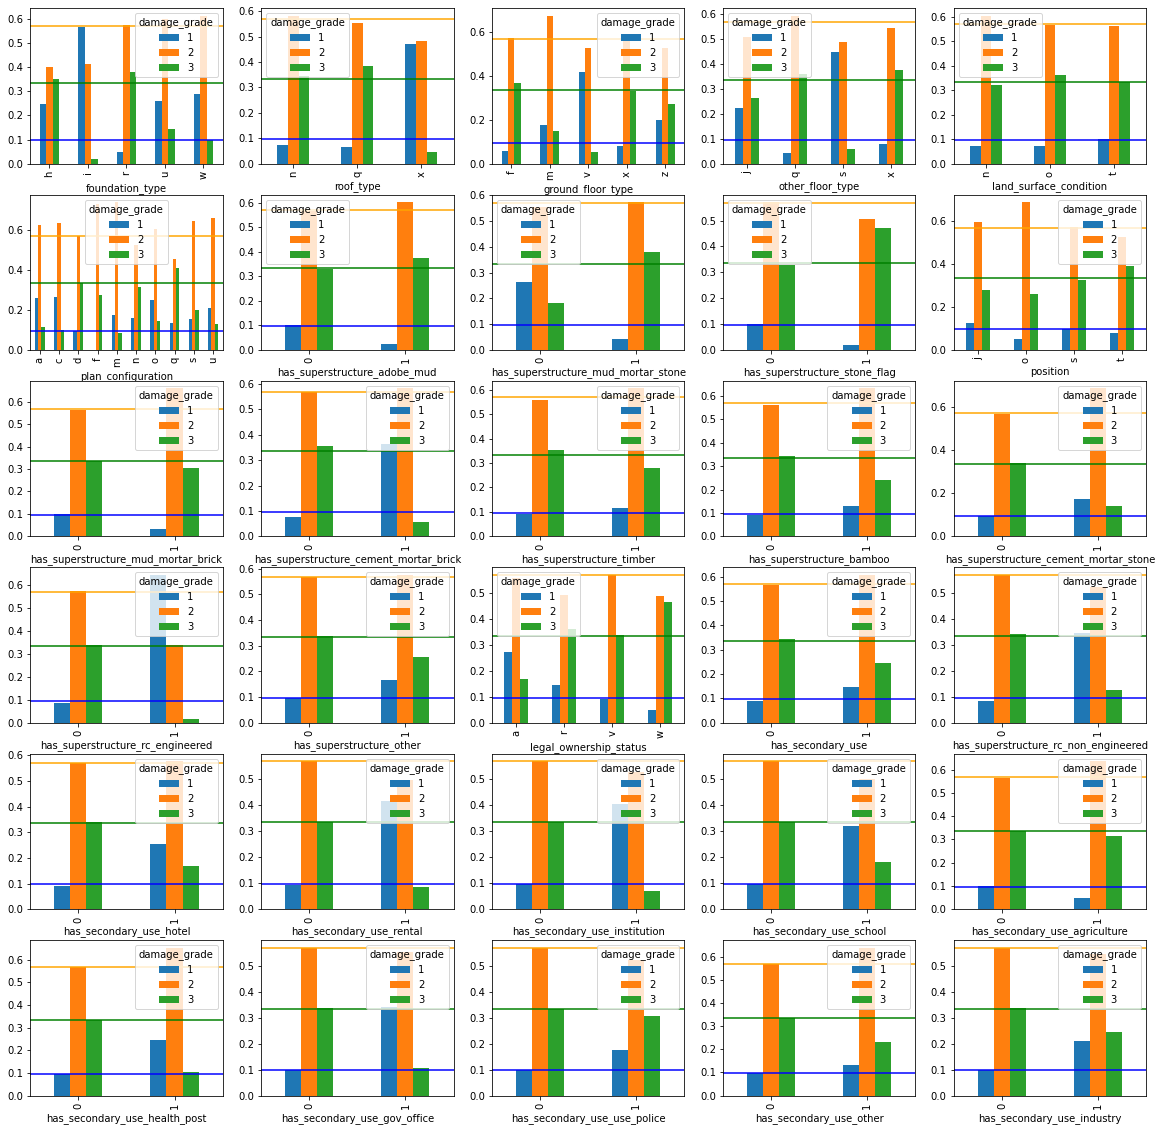

In [16]:
# Let's vizualise for cat variables without combinations
cat = merged.columns[8:27].to_list()+merged.columns[28:39].to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
row = 0
col = 0

for var in cat:
    df = pd.crosstab(index=merged['damage_grade'],
                     columns=merged[var], normalize='columns').T
    df.plot(kind='bar', ax=axes[row//5, col%5-1])
    axes[row//5, col%5-1].hlines(y=merged['damage_grade'].value_counts(
        normalize=True).loc[1], xmin=axes[row//5, col%5-1].get_xlim()[0], xmax=axes[row//5, col%5-1].get_xlim()[1], colors='b')
    axes[row//5, col%5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[2],
                          xmin=axes[row//5, col%5-1].get_xlim()[0], xmax=axes[row//5, col%5-1].get_xlim()[1], colors='orange')
    axes[row//5, col%5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[3],
                          xmin=axes[row//5, col%5-1].get_xlim()[0], xmax=axes[row//5, col%5-1].get_xlim()[1], colors='green')
    row+=1
    col+=1
plt.show()

In [17]:
# Looking at the above, the variables who don't seem to have much influence are:
# - Land surface condition
# - superstructure variables at the exception of cement_mortar_brick, rc_engineered
# - secondary use in general, secondary use agriculture, secondary use police


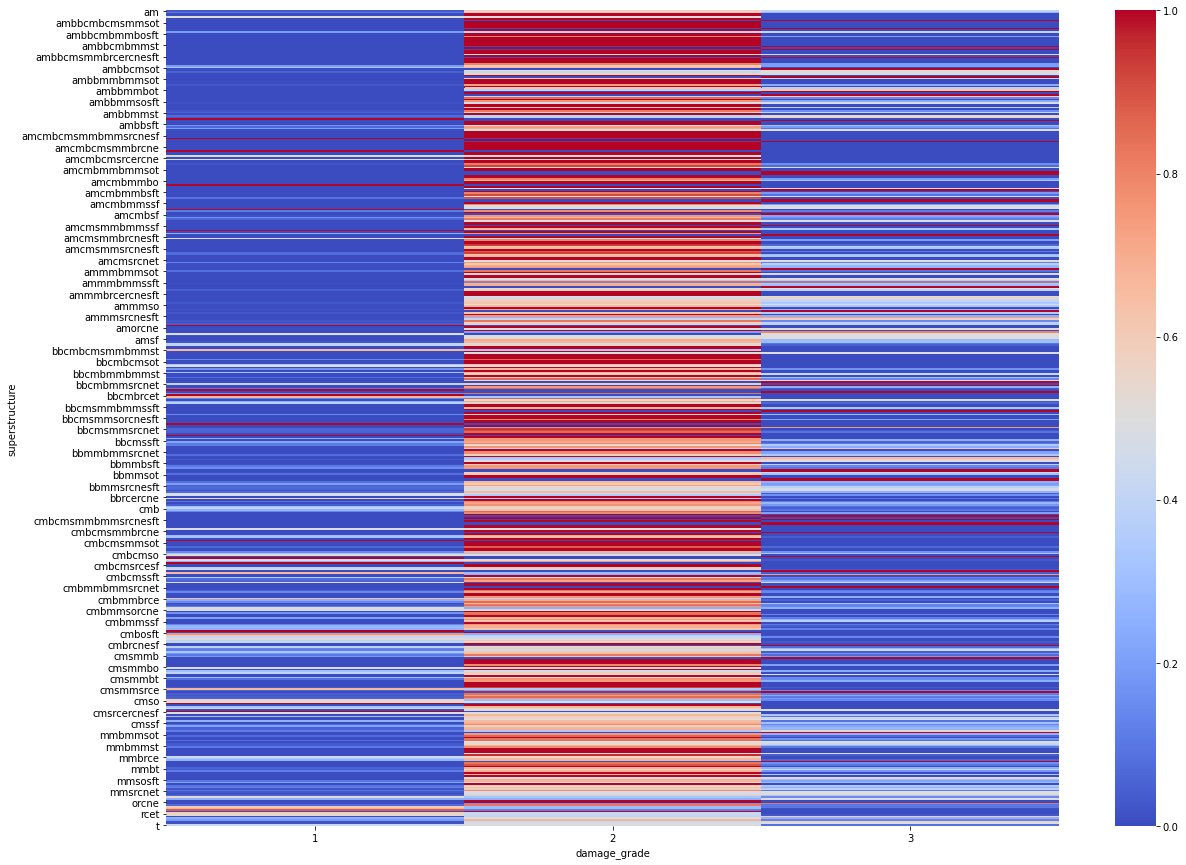

In [18]:
# Let's vizualize for combinations

df = pd.crosstab(index=merged['damage_grade'],columns=merged['superstructure'], normalize='columns').T
plt.subplots(figsize=(20,15))
sns.heatmap(df,cmap='coolwarm')
plt.show()

In [19]:
# The combination of superstructure seems to indicate more influence than just a superstructure in isolation

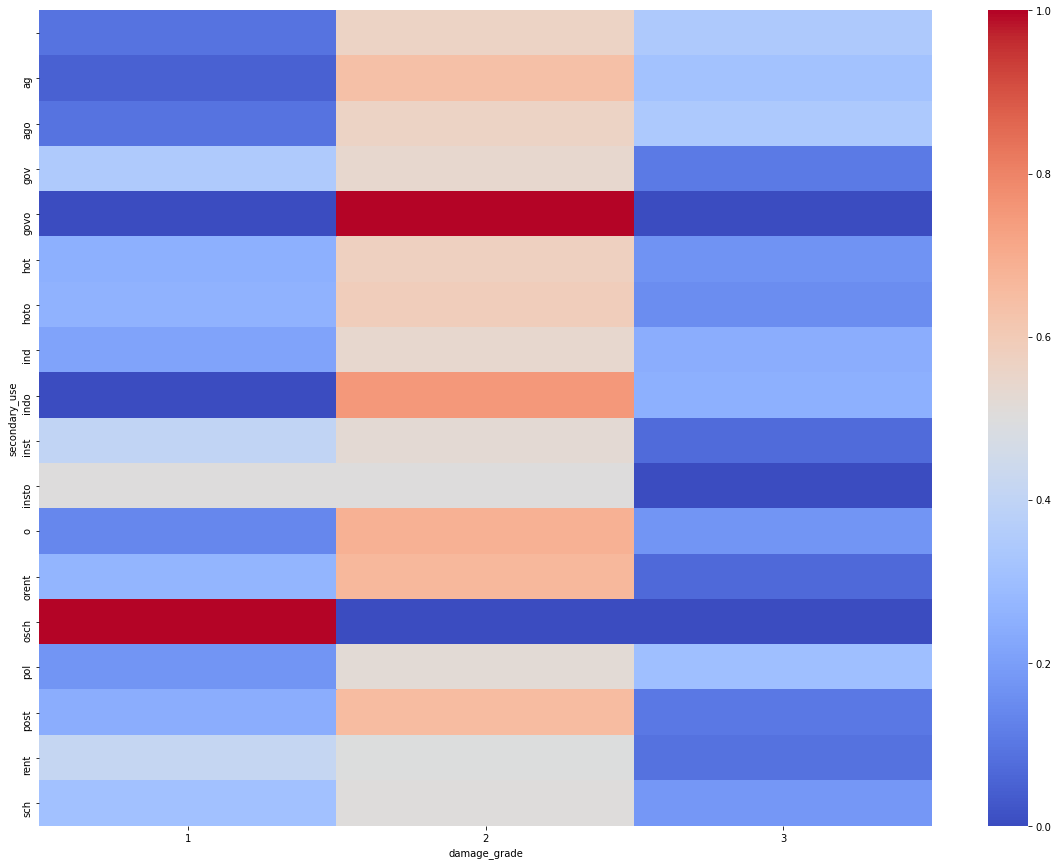

In [20]:
df = pd.crosstab(index=merged['damage_grade'],columns=merged['secondary_use'], normalize='columns').T
plt.subplots(figsize=(20,15))
sns.heatmap(df,cmap='coolwarm')
plt.show()

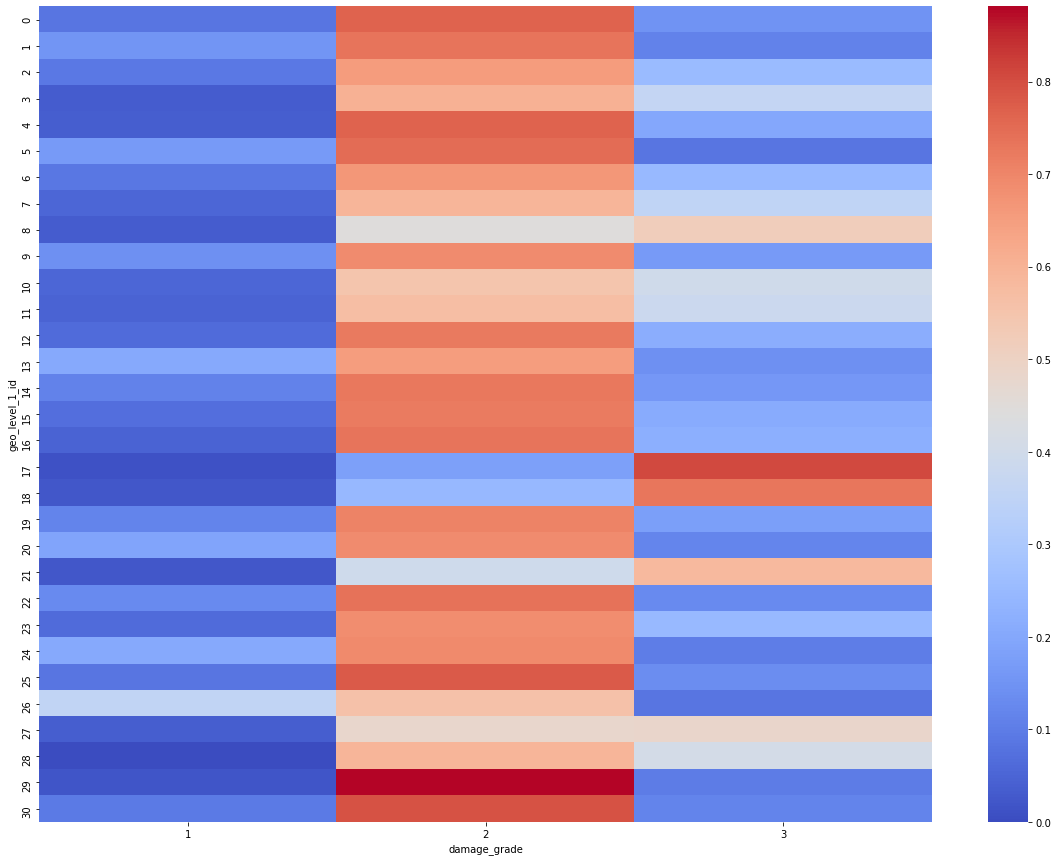

In [21]:
df = pd.crosstab(index=merged['damage_grade'],columns=merged['geo_level_1_id'], normalize='columns').T
plt.subplots(figsize=(20,15))
sns.heatmap(df,cmap='coolwarm')
plt.show()

### 3. Model

#### a. Random Forest Scikit

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.model_selection import cross_val_score,train_test_split


In [23]:
# First create X and y
X = merged.drop(['building_id','superstructure','secondary_use','damage_grade'],axis=1)

# only keeps geo_level_1 now
X.drop(['geo_level_2_id','geo_level_3_id'],axis=1,inplace=True)

y = merged['damage_grade'] 

In [24]:
# Creates binary variables for all categorical

cat_to_bin=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position',
           'plan_configuration','legal_ownership_status']

dumm = pd.get_dummies(X[cat_to_bin])

In [25]:
# Replace the cat variables by the dummies

X.drop(cat_to_bin,axis=1,inplace=True)
X = pd.merge(left=X,right=dumm,left_index=True,right_index=True)

In [26]:
# First Random Forest with default parameters

rf=RandomForestClassifier()
cross_val_score(rf,X,y,cv=3,scoring='f1_micro').mean()

0.6636275378835844

In [ ]:
# Find the best parameters with a grid search

